In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, distplot_wratio_dvar, StackedHisto, SimpleHisto, mcplot,dist2d_statsonly, Cov,DrawMatrix
from DetSysScripts import FullCov

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

Welcome to JupyROOT 6.18/04


In [2]:
datafolder = '../../data'
dumpfolder = '../PlotDumps'

RSE  = ['run','subrun','event']


cov = FullCov('../../data/CovMatrices/detsyspackFULLER_aug3.pickle')
s_cuts_current_1m1p = 'bkgBDT_run3 < .4 and Proton_CosTheta > 0 and PassPrecuts1m1p == 1 and NoDupes1m1p == 1'

cov.ClearChannels()
cov.AddChannel(s_cuts_current_1m1p,0,'1m1p')

## Set scalings

In [3]:
#wc tagger
NUMU_RUN1_POT = 4.71579e+20
NUMU_LOWE_RUN1_POT = 1.63103516179e+21
NUE_RUN1_POT  = 9.80259e+22
RUN1_POT = 4.403e+19
EXTRUN1_POT = (22474918.0) / float ( 9776965.0) * RUN1_POT #run1
DIRT_RUN1_POT = 2.61947e+20

NUMU_RUN3_POT = 8.98773223801e+20
NUMU_LOWE_RUN3_POT = 1.51234621011e+21
NUE_RUN3_POT = 4.70704675581e+22
RUN3_POT = 8.786e+18 # no beam quality  cut
EXTRUN3_POT = (39566274.0) / float (2263559) * RUN3_POT

FD_SET1_RUN1_POT = 2.01093692636e+20
FD_SET1_RUN3b_POT = 2.92776909794e+20

RUN1_FILTER_POT = 1.558e+20 + 1.129e+17 + 1.869e+19   # C1
RUN2_FILTER_POT = (1.63e+20 + 2.964e+19 + 1.239e+19) + (5.923e+19) # D2 + E1
RUN3_FILTER_POT = (1.701e+20 + 2.97e+19 + 1.524e+17) + (4.3e+19)    # G1 + F1
print(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT)


POT_SCALE_FACTOR = RUN1_FILTER_POT
print(POT_SCALE_FACTOR)


NUMU_RUN1_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN1_POT)
NUMU_LOWE_RUN1_SCALE = POT_SCALE_FACTOR / float(NUMU_LOWE_RUN1_POT)
NUMU_RUN3_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN3_POT)
NUMU_LOWE_RUN3_SCALE = POT_SCALE_FACTOR / float(NUMU_LOWE_RUN3_POT)
NUE_RUN1_SCALE = POT_SCALE_FACTOR / float(NUE_RUN1_POT)
NUE_RUN3_SCALE = POT_SCALE_FACTOR / float(NUE_RUN3_POT)
EXT_RUN1_SCALE = POT_SCALE_FACTOR / float(EXTRUN1_POT)
EXT_RUN3_SCALE = POT_SCALE_FACTOR / float(EXTRUN3_POT)
DIRT_RUN1_SCALE = POT_SCALE_FACTOR / float(DIRT_RUN1_POT)


RUN1_SCALE = POT_SCALE_FACTOR / float(RUN1_POT)
RUN3_SCALE = POT_SCALE_FACTOR / float(RUN3_POT)

RUN3_FT_SCALE = POT_SCALE_FACTOR / float(RUN3_FILTER_POT)
RUN2_FT_SCALE = POT_SCALE_FACTOR/float(RUN2_FILTER_POT)
RUN1_FT_SCALE = POT_SCALE_FACTOR/float(RUN1_FILTER_POT)

FD_SET1_RUN1_SCALE = POT_SCALE_FACTOR/float(FD_SET1_RUN1_POT)
FD_SET1_RUN3b_SCALE = POT_SCALE_FACTOR/float(FD_SET1_RUN3b_POT)

print(RUN1_POT/NUMU_RUN1_POT)

6.818153e+20
1.746029e+20
0.09336717707955612


In [4]:
FD_SET1_RUN1_POT = 2.01093692636e+20
print(FD_SET1_RUN3b_POT+FD_SET1_RUN1_POT)

4.9387060243e+20


## Load up parquets with our samples (w/ applied precuts)

In [5]:
tag = 'Aug10_fullyloaded'

df_numu_run1_presel = pd.read_parquet('%s/pickles/numu_run1_%s.parquet'%(datafolder,tag))
df_numu_run1_presel_lowe = pd.read_parquet('%s/pickles/numu_lowe_run1_%s.parquet'%(datafolder,tag))

df_numu_run3_presel= pd.read_parquet('%s/pickles/numu_run3_%s.parquet'%(datafolder,tag))
df_numu_run3_presel_lowe= pd.read_parquet('%s/pickles/numu_lowe_run3_%s.parquet'%(datafolder,tag))

df_nue_run1_presel = pd.read_parquet('%s/pickles/nue_run1_%s.parquet'%(datafolder,tag))
df_nue_run3_presel = pd.read_parquet('%s/pickles/nue_run3_%s.parquet'%(datafolder,tag))

df_ext_run1_presel = pd.read_parquet('%s/pickles/ext_run1_%s.parquet'%(datafolder,tag))
df_ext_run3_presel = pd.read_parquet('%s/pickles/ext_run3_%s.parquet'%(datafolder,tag))

df_data_run1_presel = pd.read_parquet('%s/pickles/data_run1_5e19_%s.parquet'%(datafolder,tag))
df_data_run3_presel = pd.read_parquet('%s/pickles/data_run3_1e19_%s.parquet'%(datafolder,tag))

df_data_run1_filter_presel = pd.read_parquet('%s/pickles/data_run1_filter_%s.parquet'%(datafolder,tag))
df_data_run2_filter_presel = pd.read_parquet('%s/pickles/data_run2_filter_%s.parquet'%(datafolder,tag))
df_data_run3_filter_presel = pd.read_parquet('%s/pickles/data_run3_filter_%s.parquet'%(datafolder,tag))

#df_fakedata_set1_run1_presel = pd.read_parquet('%s/pickles/fakedata_set1_run1_%s.parquet'%(datafolder,tag))
#df_fakedata_set1_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set1_run3b_%s.parquet'%(datafolder,tag))

## Define our histogram stacks

In [6]:
run1Hists = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe,df_nue_run1_presel),(NUMU_RUN1_SCALE,NUMU_LOWE_RUN1_SCALE,NUE_RUN1_SCALE))
run1Hists.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run1Hists.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run1Hists.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run1Hists.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run1Hists.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run1Hists.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
run1Hists.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
run1Hists.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
run1Hists.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
#run1Hists.AddLayer(df_dirt_run1_presel,DIRT_RUN1_SCALE,1,'Dirt','peru')
run1Hists.AddLayer(df_ext_run1_presel,EXT_RUN1_SCALE,0,'Cosmic Background','fuchsia')

run1HistsLabel = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe,df_nue_run1_presel),(NUMU_RUN1_SCALE,NUMU_LOWE_RUN1_SCALE,NUE_RUN1_SCALE))
run1HistsLabel.AddStrata("int_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run1HistsLabel.AddStrata("int_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan',f_wgt=2.0)
run1HistsLabel.AddStrata("int_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen',f_wgt=1.2)
run1HistsLabel.AddStrata("int_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow',f_wgt=1.2)
run1HistsLabel.AddStrata("int_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run1HistsLabel.AddStrata("int_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold',f_wgt=1.2)
#run1HistsLabel.AddLayer(df_dirt_run1_presel,DIRT_RUN1_SCALE,1,'Dirt','peru')
run1HistsLabel.AddLayer(df_ext_run1_presel,EXT_RUN1_SCALE,0,'Cosmic Background','fuchsia')


run1HistsJustNumu = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe),(NUMU_RUN1_SCALE,NUMU_LOWE_RUN1_SCALE))
run1HistsJustNumu.AddStrata("Enu_1m1p > 0",'All','purple')


run3Hists = StackedHisto((df_numu_run3_presel.query('MC_energyInit > 400'),df_numu_run3_presel_lowe,df_nue_run3_presel),(NUMU_RUN3_SCALE,NUMU_LOWE_RUN3_SCALE,NUE_RUN3_SCALE))
run3Hists.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
run3Hists.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
run3Hists.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
run3Hists.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
run3Hists.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
run3Hists.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
run3Hists.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
run3Hists.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
run3Hists.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')
run3Hists.AddLayer(df_ext_run3_presel,EXT_RUN3_SCALE,0,'Cosmic Background','fuchsia')


run3Dumper = StackedHisto((),())
run3Dumper.AddLayer(df_numu_run3_presel.query('MC_energyInit > 400'),NUMU_RUN3_SCALE,1,'Numu','orange')
run3Dumper.AddLayer(df_numu_run3_presel_lowe,NUMU_LOWE_RUN3_SCALE,1,'Numu LowE','red')
run3Dumper.AddLayer(df_nue_run3_presel,NUE_RUN3_SCALE,1,'Nue','pink')
run3Dumper.AddLayer(df_ext_run3_presel,EXT_RUN3_SCALE,0,'ext','purple')


run1DataHist = SimpleHisto(df_data_run1_presel,RUN1_SCALE,0,'','Run 1 Open Data')
run3DataHist = SimpleHisto(df_data_run3_presel,RUN3_SCALE,0,'','bnb1e19 [Run 3]')
run1FilterTest = SimpleHisto(df_data_run1_filter_presel,RUN1_FT_SCALE,0,'','Run 1 Filtered')
run2FilterTest = SimpleHisto(df_data_run2_filter_presel,RUN2_FT_SCALE,0,'','Run 2 Filtered')
run3FilterTest = SimpleHisto(df_data_run3_filter_presel,RUN3_FT_SCALE,0,'','Run 3 Filtered')

#run1FakedataHist_set1 = SimpleHisto(df_fakedata_set1_run1_presel,FD_SET1_RUN1_SCALE,0,'','Run 1 Fake Set 1')
#run3FakedataHist_set1 = SimpleHisto(df_fakedata_set1_run3b_presel,FD_SET1_RUN3b_SCALE,0,'','Run 3 Fake Set 1')

#fd_set_run1_pot = FD_SET1_RUN1_POT
#fd_set_run3_pot = FD_SET1_RUN3b_POT
#bigFakeData = SimpleHisto(pd.concat((df_fakedata_set1_run1_presel,df_fakedata_set1_run3b_presel)),(1.0),0,'','Fake Data Runs 1+3')
#bigFDMC = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe,df_nue_run1_presel,df_numu_run3_presel.query('MC_energyInit > 400'),df_numu_run3_presel_lowe,df_nue_run3_presel),(fd_set_run1_pot/float(NUMU_RUN1_POT),fd_set_run1_pot/float(NUMU_LOWE_RUN1_POT),fd_set_run1_pot/float(NUE_RUN1_POT),(fd_set_run3_pot)/float(NUMU_RUN3_POT),(fd_set_run3_pot)/float(NUMU_LOWE_RUN3_POT),(fd_set_run3_pot)/float(NUE_RUN3_POT)))
#bigFDMC.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
#bigFDMC.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
#bigFDMC.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
#bigFDMC.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
#bigFDMC.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
#bigFDMC.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
#bigFDMC.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
#bigFDMC.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
#bigFDMC.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')                                 


bigData = SimpleHisto(pd.concat((df_data_run1_filter_presel,df_data_run2_filter_presel,df_data_run3_filter_presel)),(1.0),0,'','Runs 1-3 Filtered')

bigMC = StackedHisto((df_numu_run1_presel.query('MC_energyInit > 400'),df_numu_run1_presel_lowe,df_nue_run1_presel,df_numu_run3_presel.query('MC_energyInit > 400'),df_numu_run3_presel_lowe,df_nue_run3_presel),(RUN1_FILTER_POT/float(NUMU_RUN1_POT),RUN1_FILTER_POT/float(NUMU_LOWE_RUN1_POT),RUN1_FILTER_POT/float(NUE_RUN1_POT),(RUN2_FILTER_POT+RUN3_FILTER_POT)/float(NUMU_RUN3_POT),(RUN2_FILTER_POT+RUN3_FILTER_POT)/float(NUMU_LOWE_RUN3_POT),(RUN2_FILTER_POT+RUN3_FILTER_POT)/float(NUE_RUN3_POT)))
#bigMC = StackedHisto((df_numu_run1_presel,df_nue_run1_presel,df_numu_run3_presel,df_nue_run3_presel),(RUN1_FILTER_POT/float(NUMU_RUN1_POT),RUN1_FILTER_POT/float(NUE_RUN1_POT),(RUN2_FILTER_POT+RUN3_FILTER_POT)/float(NUMU_RUN3_POT),(RUN2_FILTER_POT+RUN3_FILTER_POT)/float(NUE_RUN3_POT)))
bigMC.AddStrata("mc_label in ['numu_CCQE']",r'BNB $\nu_\mu$ CCQE','blue')
bigMC.AddStrata("mc_label in ['numu_MEC']",r'BNB $\nu_\mu$ MEC','cyan')
bigMC.AddStrata("mc_label in ['numu_piplusminus']",r'BNB $\nu_\mu$ Res $\pi^{+/-}$','darkgreen')
bigMC.AddStrata("mc_label in ['numu_pizero']",r'BNB $\nu_\mu$ Res $\pi^{0}$','greenyellow')
bigMC.AddStrata("mc_label in ['nue_CCQE']",r'$\nu_e$ Intrinsic','pink')
bigMC.AddStrata("mc_label in ['numu_other','BNB nue_other','nue_MEC','nue_piplusminus','nue_pizero']",r'BNB Other','gold')
bigMC.AddStrata("mc_label in ['badreco']",r'BNB Bad Reco','coral')
bigMC.AddStrata("mc_label in ['offvtx']",r'BNB 1L1P Off Vertex','grey')
bigMC.AddStrata("mc_label in ['nLmP']",r'BNB Not 1L1P','crimson')                                 
bigMC.AddLayer(df_ext_run1_presel,RUN1_FILTER_POT/float(EXTRUN1_POT),0,'Cosmic Background [Run 1]','fuchsia')
bigMC.AddLayer(df_ext_run3_presel,(RUN3_FILTER_POT+RUN2_FILTER_POT)/float(EXTRUN3_POT),0,'Cosmic Background [Run 3(x2)]','violet')


In [7]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}
covfolder = 'CovMatrices_Aug10'
covtag = 'frac_covar_sel'

varListSel = {}

varListSel['Xreco'] = distVar('Xreco',(15,241.25),'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,600),'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')

In [8]:
nbins = 36
s_annotation = 'All Precuts, Orthogonality Cuts\nand No Duplicate Vertices'

Normalization Uncertainty: 0.0
3.683531561881124 5.566658245470535e-13


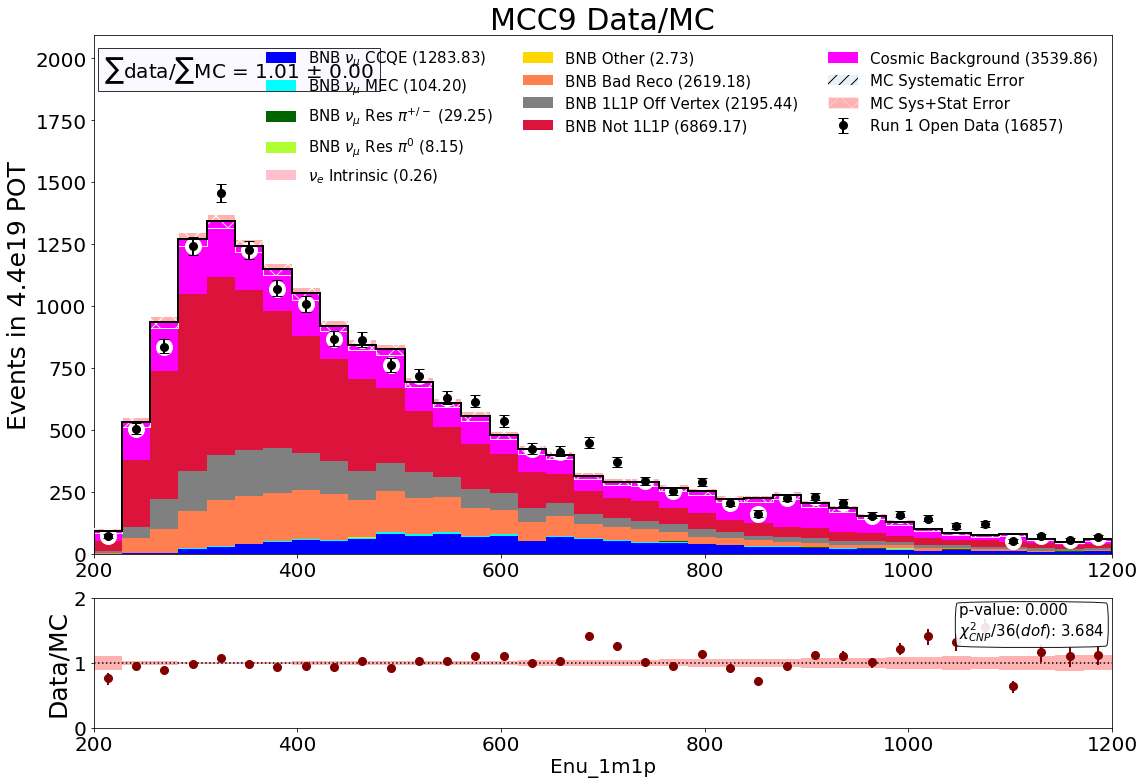

In [9]:
# distplot_wratio(string of variable name, number of bins, range, stacked histo list, data list, name for x-axis)
# for other arguments, see PlottingScripts.py

vartest = 'Enu_1m1p'
varname = vartest#r'Reconstructed $E_\nu$'
myrange = (200,1200)

fig,ax0,_,_ = distplot_wratio(vartest,nbins,myrange,run1Hists,run1DataHist,varname,np.zeros((nbins,nbins)),normshift=.97)
#ax0.annotate(s_annotation,xy=(.75,.6), xycoords='axes fraction',fontsize=15)
#ax0.annotate('No Low E Patch',xy=(.75,.5), xycoords='axes fraction',fontsize=20)
#ax0.set_ylabel('Events in 5e19 POT',fontsize=25)

Normalization Uncertainty: 0.0
2.393169571978486 1.2218098475291761e-05


/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:220: RuntimeWarning: invalid value encountered in true_divide


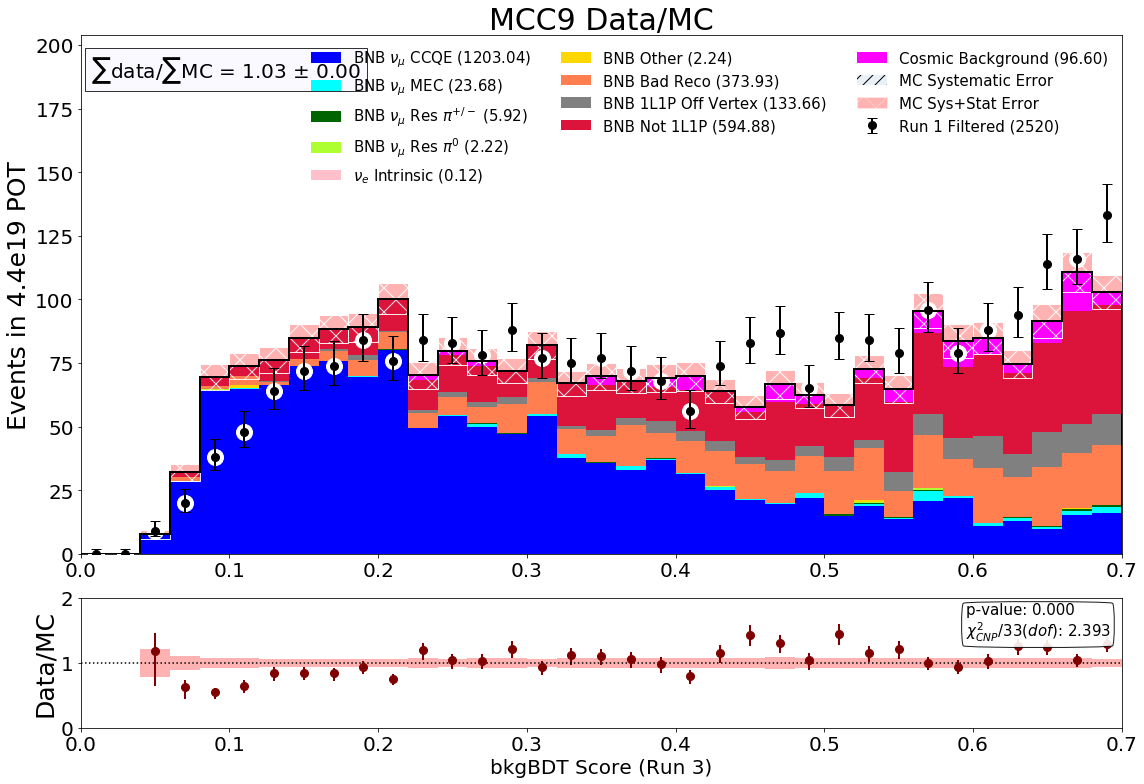

In [11]:
# distplot_wratio(string of variable name, number of bins, range, stacked histo list, data list, name for x-axis)
# for other arguments, see PlottingScripts.py

vartest = 'bkgBDT_univ'
varname = 'bkgBDT Score (Run 3)'
myrange = (0,.7)
nbins=35

#syscov = np.nan_to_num(cov.Polyfit([distVar('bkgBDT_run3',myrange)],[nbins],False))
syscov = np.zeros((nbins,nbins))

fig,ax0,_,_ = distplot_wratio(vartest,nbins,myrange,run1Hists,run1FilterTest,varname,syscov)



#ax0.set_yscale('log')
#ax0.set_ylim(1,10e5)
#ax0.set_ylabel('Events in 1e19 POT',fontsize=25)
#ax0.set_ylabel('Events in 1.5e21 POT',fontsize=25)


#ax0.axvline(0.4)
#ax0.fill_between((.4,1),0,1e6,hatch='X',zorder=10,facecolor='none',edgecolor='lavender')
#d = ax0.legend(loc='upper right',fontsize=15,frameon=False,ncol=3)
#d.set_zorder(11)

# Apply cuts

In [13]:
bdtcuts = 'bkgBDT_univ < .4'


emptycut = 'Enu_1m1p > 0'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'

s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts
    
s_ano_simple_w = wrap('BDT Cuts and '+s_cuts,28)
s_ano_simple = '' 
for ln in s_ano_simple_w:
    s_ano_simple += ln + '\n'

In [14]:
run1Hists.AddCut(s_cuts)
run3Hists.AddCut(s_cuts)
run1DataHist.AddCut(s_cuts)
run3DataHist.AddCut(s_cuts)
run1FilterTest.AddCut(s_cuts)
run2FilterTest.AddCut(s_cuts)
run3FilterTest.AddCut(s_cuts)


bigData.AddCut(s_cuts)
bigMC.AddCut(s_cuts)

#bigFakeData.AddCut(s_cuts)
#bigFDMC.AddCut(s_cuts)


#errlabel = 'Flux Sys Only'

wiremodX 1m1p Polyfit Degrees: 0 11.25613678826226
wiremodYZ 1m1p Polyfit Degrees: 0 13.758091820610893
wiremoddEdx 1m1p Polyfit Degrees: 0 10.830113304985893
LYdown 1m1p Polyfit Degrees: 0 8.37141121758355
LYdownRayleigh 1m1p Polyfit Degrees: 0 10.376294983757866
SCE 1m1p Polyfit Degrees: 0 19.975596321953667
wiremodThetaYZ 1m1p Polyfit Degrees: 0 20.225785149468315
wiremodThetaXZ 1m1p Polyfit Degrees: 0 14.197621239556206
Sub  1\% contributions:
['BNB $\\nu_\\mu$ MEC (32.96)', 'BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (5.06)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (4.32)', '$\\nu_e$ Intrinsic (0.14)', 'BNB Other (2.24)', 'Cosmic Background [Run 1] (5.18)']
Normalization Uncertainty: 0.1273058136933934
1.0578173573342007 0.3886712606089031


Text(121.5, 0.5, 'Events in Data Set')

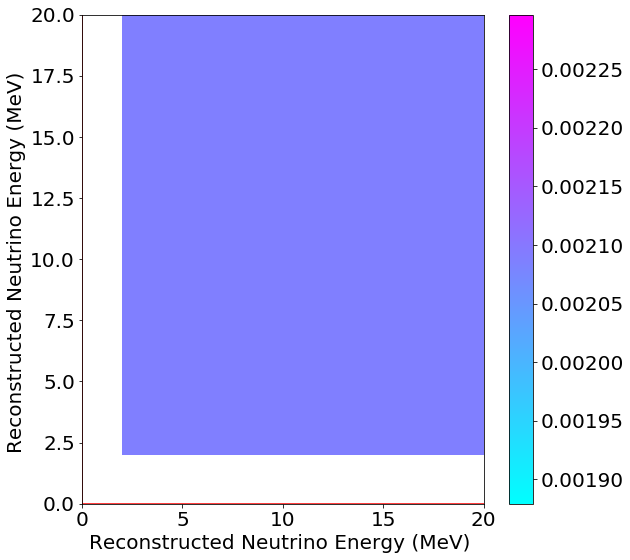

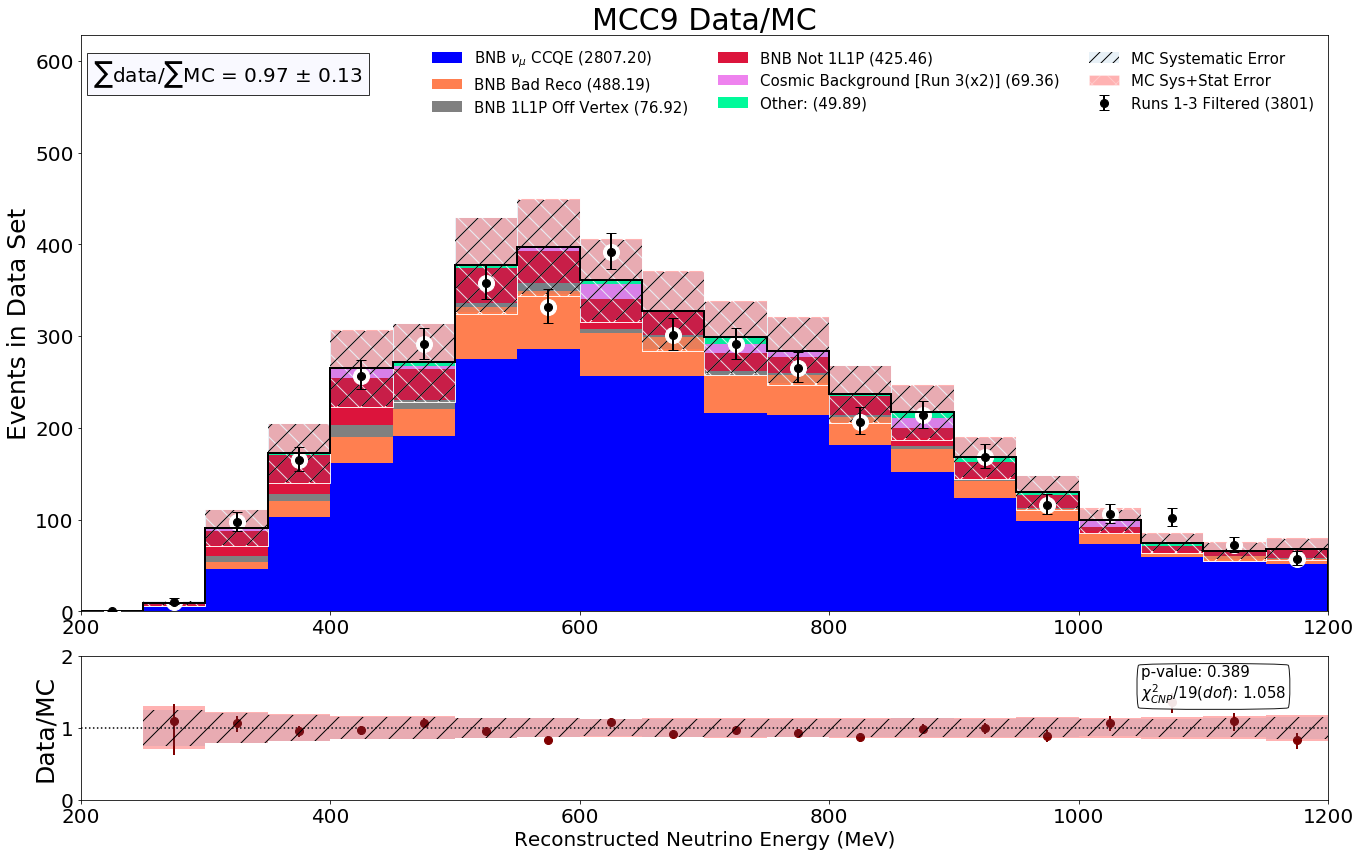

In [18]:
nbins = 20
dvar = varListSel['Enu_1m1p']
syscov = np.genfromtxt(dvar.myscov,delimiter=',') + np.nan_to_num(cov.Polyfit([dvar],[nbins],True))


fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,bigMC,bigData,syscov,fs=(19,12),consFac=.01)
ax0.set_ylabel('Events in Data Set',fontsize=25)

#ax0.annotate('MicroBooNE Preliminary',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('Nominal Cov Matrix',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('TEMPORARY PLACEHOLDER',xy=(.4,.5), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')

wiremodX 1m1p Polyfit Degrees: 0 18.799680540434064
wiremodYZ 1m1p Polyfit Degrees: 0 13.096078859528784
wiremoddEdx 1m1p Polyfit Degrees: 0 18.449594991412923
LYdown 1m1p Polyfit Degrees: 0 6.439268947559724
LYdownRayleigh 1m1p Polyfit Degrees: 0 4.748822355279681
SCE 1m1p Polyfit Degrees: 1 30.103502874930385
wiremodThetaYZ 1m1p Polyfit Degrees: 0 18.343482142222555
wiremodThetaXZ 1m1p Polyfit Degrees: 0 40.629938106492084
Sub  1\% contributions:
['BNB $\\nu_\\mu$ Res $\\pi^{+/-}$ (8.06)', 'BNB $\\nu_\\mu$ Res $\\pi^{0}$ (4.69)', '$\\nu_e$ Intrinsic (0.14)', 'BNB Other (2.24)', 'Cosmic Background [Run 1] (5.18)']
Normalization Uncertainty: 0.2060171200088976
2.5083609551841266 0.0014125066859504987


(0, 2)

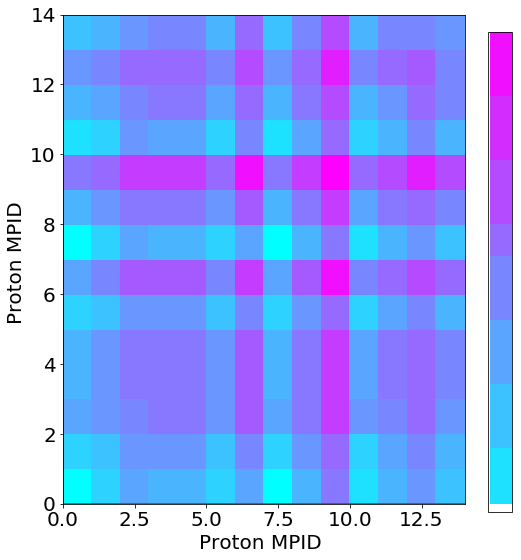

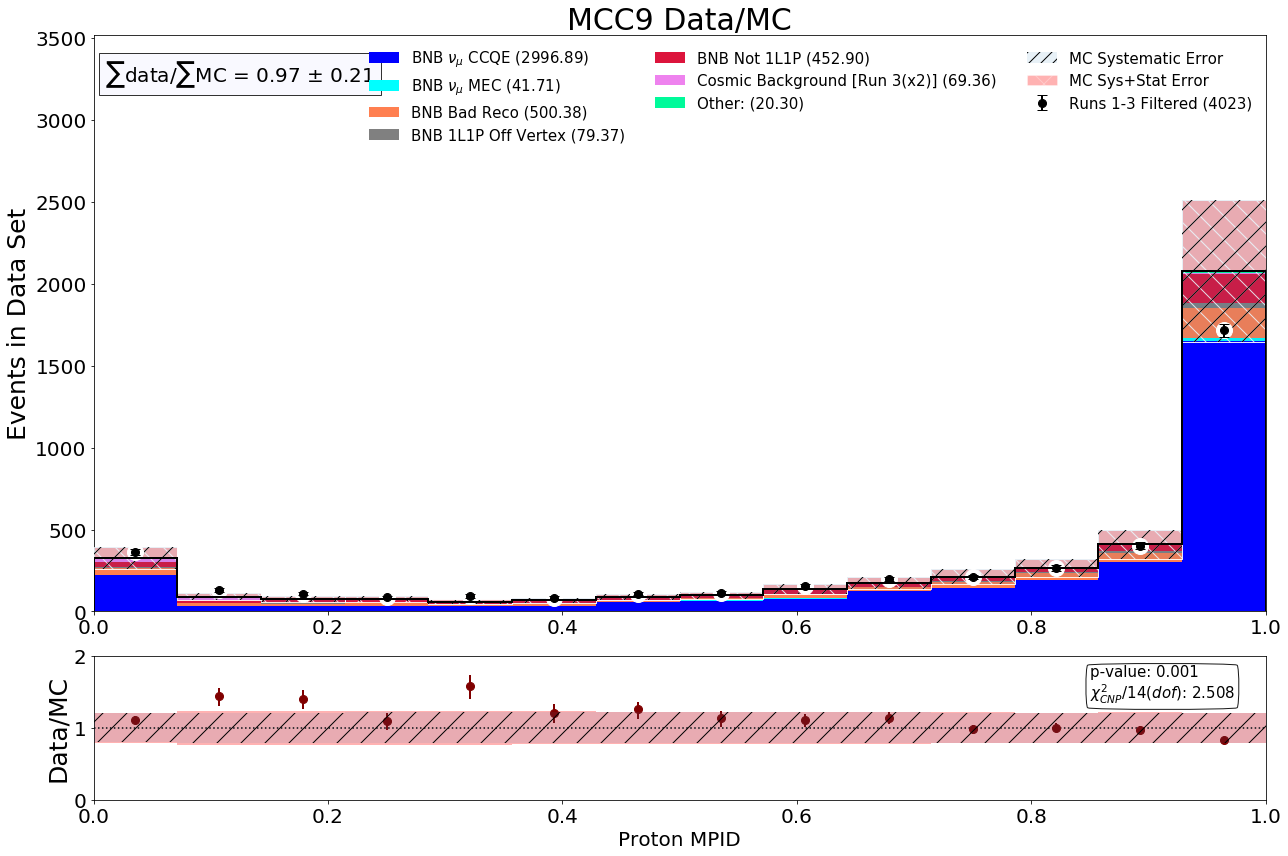

In [15]:
nbins = 14
dvar = varListSel['MPID_proton']
syscov = np.genfromtxt(dvar.myscov,delimiter=',') + np.nan_to_num(cov.Polyfit([dvar],[nbins],True))


fig,ax0,ax1,_ = distplot_wratio_dvar(dvar,nbins,bigMC,bigData,syscov,fs=(18,12),consFac=.01)
ax0.set_ylabel('Events in Data Set',fontsize=25)

#ax0.annotate('MicroBooNE Preliminary',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('Nominal Cov Matrix',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
#ax0.annotate('TEMPORARY PLACEHOLDER',xy=(.4,.5), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')

In [20]:
# This guy will just dump a bunch of plots for you

!!

nbins = 14
dumphole = 'data_runs1thru3_aug12plotterupdates'     # where do you want these plots to go?
myMCStack = bigMC                                   # your MC
myDataHist = bigData                                 # your data
s_yaxis = 'Events in 6.8e20 POT'                     # y axis label

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

a_pval = []
a_varname = []
    
for x,dist in varListSel.items():
    print(dist.myname)
    try:
        syscov = np.genfromtxt(dist.myscov,delimiter=',') + np.nan_to_num(cov.Polyfit([dist],[nbins]))
        fig,ax0,ax1,pval = distplot_wratio(dist.myname,nbins,dist.myrange,myMCStack,myDataHist,dist.mylabel,syscov,fs=(18,12))
        a_pval.append(pval)
        a_varname.append(dist.myname)
    except:
        print('Oops, no flux+xsec matrix found for ',dist.myname)
        syscov = np.nan_to_num(cov.Polyfit([dist],[nbins]))
        fig,ax0,ax1,pval = distplot_wratio_dvar(varListSel[dist.myname],nbins,myMCStack,myDataHist,syscov,fs=(18,12))
        ax0.annotate('No Flux+XSec Systematics',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
    
    ax0.set_ylabel(s_yaxis,fontsize=20)
    ax0.annotate('MicroBooNE Preliminary',xy=(.53,.72), xycoords='axes fraction',fontsize=30,color='black',weight = 'bold')
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

Xreco
wiremodX 1m1p Polyfit Degrees: 0 8.26139243443807
wiremodYZ 1m1p Polyfit Degrees: 0 8.300151666005453
wiremoddEdx 1m1p Polyfit Degrees: 0 6.836298783620198
LYdown 1m1p Polyfit Degrees: 0 5.249008735020955
LYdownRayleigh 1m1p Polyfit Degrees: 0 3.904093941052755
SCE 1m1p Polyfit Degrees: 0 9.659433682759603
wiremodThetaYZ 1m1p Polyfit Degrees: 0 6.300984223683675
wiremodThetaXZ 1m1p Polyfit Degrees: 0 10.085695107777914
Normalization Uncertainty: 0.12614544346778833
3.1273282580354764 6.416649303053745e-05
Yreco
wiremodX 1m1p Polyfit Degrees: 0 11.120586713155111
wiremodYZ 1m1p Polyfit Degrees: 0 8.554850419362387
wiremoddEdx 1m1p Polyfit Degrees: 0 8.585004647572836
LYdown 1m1p Polyfit Degrees: 0 8.588611920674643
LYdownRayleigh 1m1p Polyfit Degrees: 0 5.584718306859334
SCE 1m1p Polyfit Degrees: 0 15.805862744649252
wiremodThetaYZ 1m1p Polyfit Degrees: 0 9.160473187764486
wiremodThetaXZ 1m1p Polyfit Degrees: 0 10.750371297200521
Normalization Uncertainty: 0.127358400363402
0.8724

/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/DetSysScripts.py:263: RuntimeWarning: invalid value encountered in double_scalars
  cov_poly[i,j] += (hSys[i]-hCV[i])*(hSys[j]-hCV[j])/(hCV[i]*hCV[j])


Normalization Uncertainty: 0.12452183047258322
2.008317634937236 0.013729953300607112
Thetas
wiremodX 1m1p Polyfit Degrees: 0 18.260591824849445
wiremodYZ 1m1p Polyfit Degrees: 0 24.864007314046223
wiremoddEdx 1m1p Polyfit Degrees: 0 13.6364377339681
LYdown 1m1p Polyfit Degrees: 0 5.307586510976155
LYdownRayleigh 1m1p Polyfit Degrees: 0 9.718474706013998
SCE 1m1p Polyfit Degrees: 0 26.84255536397298
wiremodThetaYZ 1m1p Polyfit Degrees: 2 29.480633163452147
wiremodThetaXZ 1m1p Polyfit Degrees: 0 51.36771138509115
Normalization Uncertainty: 0.16624760491987203
1.8363378749716197 0.03711771054170554


/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:220: RuntimeWarning: invalid value encountered in true_divide


Phis
wiremodX 1m1p Polyfit Degrees: 0 37.52656682332357
wiremodYZ 1m1p Polyfit Degrees: 1 26.583758440884676
wiremoddEdx 1m1p Polyfit Degrees: 2 nan
LYdown 1m1p Polyfit Degrees: 0 14.418654759724935
LYdownRayleigh 1m1p Polyfit Degrees: 1 14.91328629580411
SCE 1m1p Polyfit Degrees: 0 22.095019658406574
wiremodThetaYZ 1m1p Polyfit Degrees: 2 41.724005126953124
wiremodThetaXZ 1m1p Polyfit Degrees: 0 27.08878453572591


/home/dcianci/Physics/1e1p/1L1PSelection/Notebooks/DetSysScripts.py:246: RuntimeWarning: invalid value encountered in sqrt
  yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*h0),h0,out=np.zeros_like(bincenters),where=h0!=0)


Normalization Uncertainty: 0.12237380339610043
0.7107805769314872 0.7657623054464948
ChargeNearTrunk
wiremodX 1m1p Polyfit Degrees: 0 21.143208821614582
wiremodYZ 1m1p Polyfit Degrees: 0 10.611131032307943
wiremoddEdx 1m1p Polyfit Degrees: 0 13.484539349873861
LYdown 1m1p Polyfit Degrees: 0 16.2240727742513
LYdownRayleigh 1m1p Polyfit Degrees: 0 8.89481814702352
SCE 1m1p Polyfit Degrees: 0 26.61212666829427
wiremodThetaYZ 1m1p Polyfit Degrees: 0 179.26976521809897
wiremodThetaXZ 1m1p Polyfit Degrees: 0 51.88366826375326
Normalization Uncertainty: 0.24064290101271382
1.3446731450006815 0.17172770043266672
Enu_1m1p
wiremodX 1m1p Polyfit Degrees: 0 11.53161652882894
wiremodYZ 1m1p Polyfit Degrees: 0 10.869021733601889
wiremoddEdx 1m1p Polyfit Degrees: 0 9.74440892537435
LYdown 1m1p Polyfit Degrees: 0 9.335423787434896
LYdownRayleigh 1m1p Polyfit Degrees: 0 9.116789182027182
SCE 1m1p Polyfit Degrees: 0 15.47989018758138
wiremodThetaYZ 1m1p Polyfit Degrees: 0 7.619913895924886
wiremodThetaX

Normalization Uncertainty: 0.12319583086374462
0.9960241876519552 0.45386609409629075
Muon_Edep
wiremodX 1m1p Polyfit Degrees: 0 10.457009633382162
wiremodYZ 1m1p Polyfit Degrees: 0 10.693778355916342
wiremoddEdx 1m1p Polyfit Degrees: 0 9.716899712880453
LYdown 1m1p Polyfit Degrees: 0 7.33518918355306
LYdownRayleigh 1m1p Polyfit Degrees: 0 7.218615372975667
SCE 1m1p Polyfit Degrees: 0 10.004647572835287
wiremodThetaYZ 1m1p Polyfit Degrees: 0 9.014914353688559
wiremodThetaXZ 1m1p Polyfit Degrees: 0 8.64701541264852
Normalization Uncertainty: 0.12153935476753222
0.550690456270656 0.9038966798249186
Proton_PhiReco
wiremodX 1m1p Polyfit Degrees: 0 21.765029271443684
wiremodYZ 1m1p Polyfit Degrees: 0 27.879252751668293
wiremoddEdx 1m1p Polyfit Degrees: 0 12.386844952901205
LYdown 1m1p Polyfit Degrees: 0 7.975817998250325
LYdownRayleigh 1m1p Polyfit Degrees: 0 7.0403116544087725
SCE 1m1p Polyfit Degrees: 0 19.015281041463215
wiremodThetaYZ 1m1p Polyfit Degrees: 0 12.079259236653646
wiremodTh

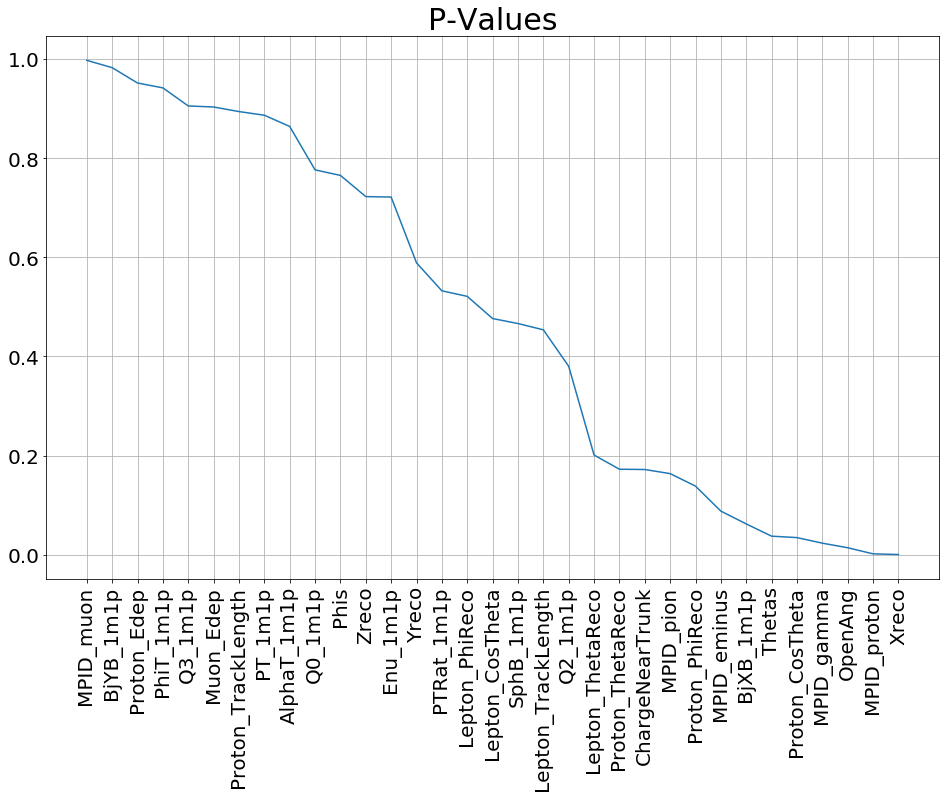

In [21]:
#scalesort = gh_scale[i].argsort()
#        sorted_vals = gh_vals[i][scalesort[::-1]]

a_pval.append(.722)
a_varname.append('Enu_1m1p')

psort = np.array(a_pval).argsort()
sorted_pval = np.array(a_pval)[psort[::-1]]
sorted_varname = np.array(a_varname)[psort[::-1]]
    
fig,ax = plt.subplots(figsize=(16,10))
ax.set_title('P-Values',fontsize=30)
plt.plot(range(len(sorted_pval)), sorted_pval)
plt.xticks(range(len(varListSel)),sorted_varname, rotation='vertical',fontsize=20)
plt.grid(True)
plt.savefig(dumphole+'/pvals.png')

# Print everything out for whoever wants it

In [13]:
bdtcuts = 'bkgBDT_univ < .4'
emptycut = 'Enu_1m1p > 0'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'

s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts

tag = 'Aug10'

print("df_numu_run1_presel:",len(df_numu_run1_presel.query(s_cuts + ' and MC_energyInit > 400')))
print("df_numu_run1_presel_lowe:",len(df_numu_run1_presel_lowe.query(s_cuts)))
print("df_numu_run3_presel:",len(df_numu_run3_presel.query(s_cuts + ' and MC_energyInit > 400')))
print("df_numu_run3_presel_lowe:",len(df_numu_run3_presel_lowe.query(s_cuts)))
print("df_nue_run1_presel:",len(df_nue_run1_presel.query(s_cuts)))
print("df_nue_run3_presel:",len(df_nue_run3_presel.query(s_cuts)))
print("df_ext_run1_presel:",len(df_ext_run1_presel.query(s_cuts)))
print("df_ext_run3_presel:",len(df_ext_run3_presel.query(s_cuts)))


RSEVE = ['run','subrun','event','vtxid','Enu_1m1p']

df_numu_run1_presel.query(s_cuts + ' and MC_energyInit > 400')[selvars].to_csv('~/Downloads/numu_run1_%s.csv'%tag)
df_numu_run1_presel_lowe.query(s_cuts)[selvars].to_csv('~/Downloads/numu_run1_lowE_%s.csv'%tag)
df_numu_run3_presel.query(s_cuts + ' and MC_energyInit > 400')[selvars].to_csv('~/Downloads/numu_run3_%s.csv'%tag)
df_numu_run3_presel_lowe.query(s_cuts)[selvars].to_csv('~/Downloads/numu_run3_lowE_%s.csv'%tag)
df_nue_run1_presel.query(s_cuts)[selvars].to_csv('~/Downloads/nue_run1_%s.csv'%tag)
df_nue_run3_presel.query(s_cuts)[selvars].to_csv('~/Downloads/nue_run3_%s.csv'%tag)
df_ext_run1_presel.query(s_cuts)[selvars].to_csv('~/Downloads/ext_run1_%s.csv'%tag)
df_ext_run3_presel.query(s_cuts)[selvars].to_csv('~/Downloads/ext_run3_%s.csv'%tag)

df_data_run1_filter_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/dataSelected_RSEVE_run1_filter_%s.csv'%tag)
df_data_run2_filter_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/dataSelected_RSEVE_run2_filter_%s.csv'%tag)
df_data_run3_filter_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/dataSelected_RSEVE_run3_filter_%s.csv'%tag)

df_fakedata_set1_run1_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_run1_%s.csv'%tag)
df_fakedata_set1_run3b_presel.query(s_cuts)[RSEVE].to_csv('~/Downloads/fakedataSelected_RSEVE_run3_%s.csv'%tag)

df_numu_run1_presel: 2265
df_numu_run1_presel_lowe: 425
df_numu_run3_presel: 3984
df_numu_run3_presel_lowe: 212
df_nue_run1_presel: 171
df_nue_run3_presel: 61
df_ext_run1_presel: 3
df_ext_run3_presel: 21


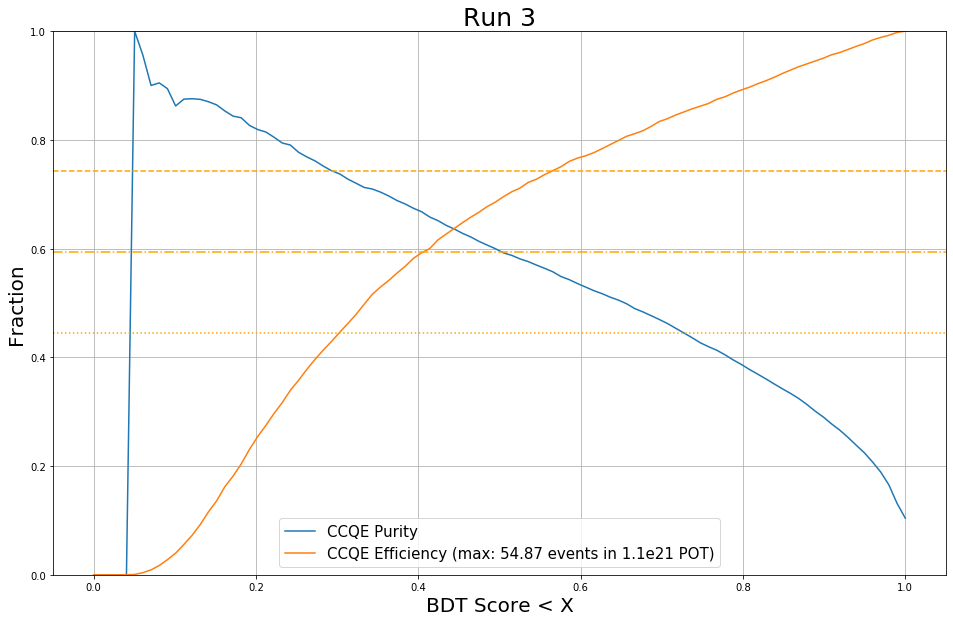

In [23]:
# Okay, let's do this way less sloppy.
s_defaultcut = s_cuts#+ ' and ' + bdtcuts_run23
s_testcut_template = s_defaultcut+' and bkgBDT_univ < %f'
#s_testcut_template = s_defaultcut+' and (MPID_proton > %f or MPID_proton == 0) and (MPID_muon > %f or MPID_muon==0)'

myrange = (0,1)
mydx = 100
a_cutspace = np.linspace(myrange[0],myrange[1],mydx)

run3Hists.AddCut(s_defaultcut)
hp_vals,_,_,hp_wgts,hp_scale = run3Hists.GetHists('Enu_1m1p')
hCCQE,_ = np.histogram(hp_vals[0],1,range=(300,1000),weights=hp_wgts[0]*hp_scale[0])
nevts_ccqe_max = hCCQE.sum()
    
frac_purity = []
frac_efficiency = []


for i in range(mydx):
    s_testcut = s_testcut_template%(a_cutspace[i])
    
    run3Hists.AddCut(s_testcut)
    hp_vals,_,_,hp_wgts,hp_scale = run3Hists.GetHists('Enu_1m1p')  # histpack: a_vals,a_cols,a_labels,a_wgts,a_scale
    nevts_mc_normed = 0
    for j in range(len(hp_vals)):
        h1,_ = np.histogram(hp_vals[j],1,range=(300,1000),weights=hp_wgts[j]*hp_scale[j])
        nevts_mc_normed += h1.sum()
    hCCQE,_ = np.histogram(hp_vals[0],1,range=(300,1000),weights=hp_wgts[0]*hp_scale[0])
    nevts_ccqe_normed = hCCQE.sum()
    
    if(nevts_mc_normed != 0):
        frac_purity.append(nevts_ccqe_normed/float(nevts_mc_normed))
    else:
        frac_purity.append(0)
    
    frac_efficiency.append(nevts_ccqe_normed/float(nevts_ccqe_max))
    
fig,ax = plt.subplots(figsize=(16,10))
#ax.set_title('P',fontsize=30)
plt.plot(a_cutspace,frac_purity,label='CCQE Purity')
plt.plot(a_cutspace,frac_efficiency,label='CCQE Efficiency (max: %.2f events in 1.1e21 POT)'%nevts_ccqe_max)

ax.legend(fontsize=15)
plt.grid(True)
ax.set_title('Run 3',fontsize=25)
ax.set_xlabel('BDT Score < X',fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_ylim((0,1))


ax.axhline(3000/float(6734),color='orange',linestyle=':')
ax.axhline(4000/float(6734),color='orange',linestyle='-.')
ax.axhline(5000/float(6734),color='orange',linestyle='--')


## mostly experimental  2d  plots

In [ ]:
!!
dumphole = '2d_run1_alphaT'
varcompare = varListSel['AlphaT_1m1p']
nbins = 7

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
    
for x,dist in varListSel.items():
    print(dist.myname)
    _ = dist2d_statsonly(varcompare,dist,nbins,nbins,run1FilterTest,run1Hists)
    plt.savefig(dumphole+'/'+dist.myname+'.png')

SyntaxError: invalid syntax (<ipython-input-43-6aacd145d8b5>, line 1)

Text(0.5, 0, 'BDT Score')

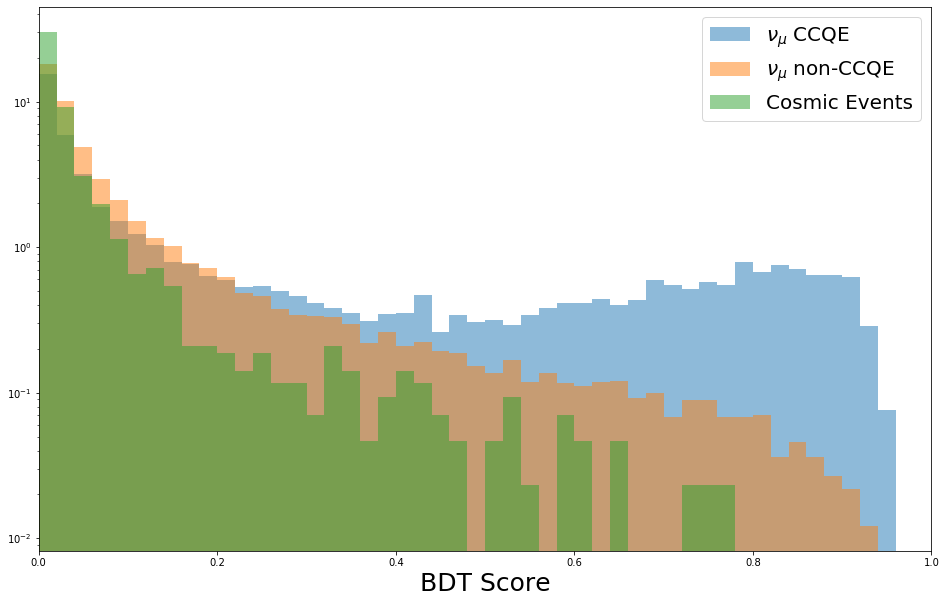

In [124]:
var_ccqe = df_numu_run1_presel.query("int_label in ['numu_CCQE']")['bkgBDT_univ']
var_nonccqe = df_numu_run1_presel.query("int_label not in ['numu_CCQE']")['bkgBDT_univ']
var_ext = df_ext_run1_presel['bkgBDT_univ']

fig,ax = plt.subplots(figsize=(16,10))
_ = plt.hist(1-var_ccqe,range=(0,1),bins=50,density=1,label=r'$\nu_\mu$ CCQE',alpha=.5)
_ = plt.hist(1-var_nonccqe,range=(0,1),bins=50,density=1,label=r'$\nu_\mu$ non-CCQE',alpha=.5)
_ = plt.hist(1-var_ext,range=(0,1),bins=50,density=1,label='Cosmic Events',alpha=.5)

ax.set_yscale('log')
ax.set_xlim((0,1))
ax.legend(fontsize=20)
ax.set_xlabel('BDT Score',fontsize=25)

(array([435., 652., 533., 448., 376., 333., 354., 242., 207., 167., 128.,
         93.,  48.,  18.]),
 array([0.2       , 0.38571429, 0.57142857, 0.75714286, 0.94285714,
        1.12857143, 1.31428571, 1.5       , 1.68571429, 1.87142857,
        2.05714286, 2.24285714, 2.42857143, 2.61428571, 2.8       ]),
 <a list of 14 Patch objects>)

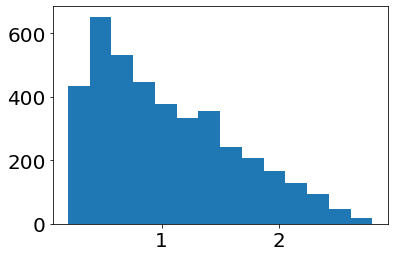

In [79]:
dumptest = pd.read_table('/home/dcianci/Downloads/numu_run3_July30_xcheck.csv',sep=',')

plt.hist(dumptest['Lepton_ThetaReco'],14,(.2,2.8))